<a href="https://colab.research.google.com/github/SubodhKamde/SubodhKamde/blob/main/TSF_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Demonstrated and Performed by  **
      SUBODH KAMDE




     subodhkamde12@gmail.com
Data Science& Business Analytics Intern June2021
Technical TASK 1 :- Prediction using Supervised ML (Level - Beginner)

In this task, i will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.


In [ ]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading Data from online source

In [ ]:
# Reading the data
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [ ]:
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


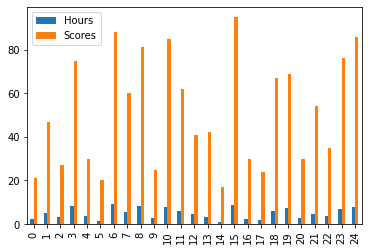

In [ ]:
# Plotting the relationship between hours and score (in bar graph)
df.plot(kind='bar')

DATA VISUALIZATION


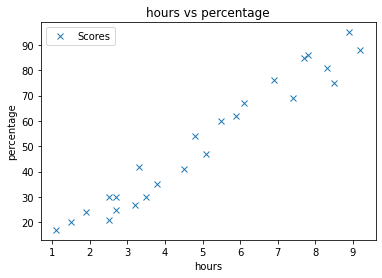

In [ ]:
# Plotting the relationship between hours and score (in points)
df.plot(x='Hours',y='Scores',style='x')
plt.title('hours vs percentage')
plt.xlabel('hours')
plt.ylabel('percentage')
plt.show()

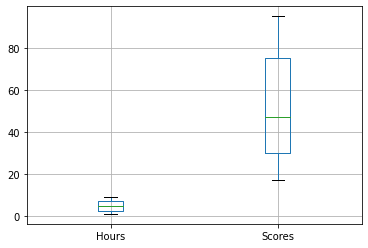

In [ ]:
df.boxplot()

As we can see there is a positive relationship between Hours and Score

Preparing The Data

In [ ]:

x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Algorithm Training

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Training Done!!")

Training Done!!


Ploting the line of regression

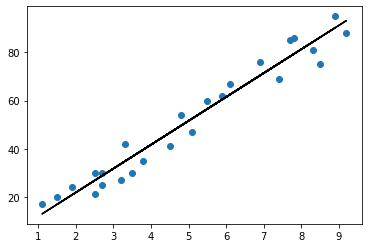

In [ ]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()

Making Predictions

In [ ]:
### Testing data - In Hours
print(x_test)

### Predicting the scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual vs Predicted




In [ ]:
### Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
### Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(x_train, y_train))
print("Testing score:", regressor.score(x_test, y_test))

Training score: 0.9515510725211553
Testing score: 0.9454906892105354


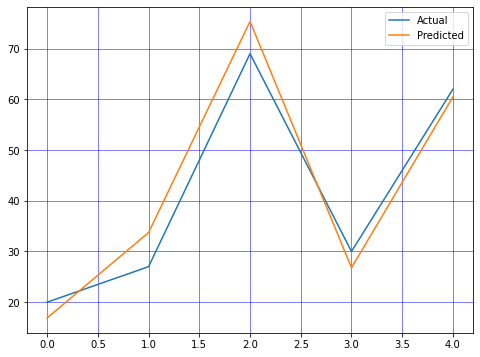

In [ ]:
### Ploting the line graph to depict the diffrence between the actual and predicted value.
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [ ]:
### Testing your own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


THUS WE FOUND OUT THE PREDICTED SCORE OF A STUDENT WHO STUDIES 9.25 HR A DAY

Evaluating the model

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root mean squared Error: 4.647447612100373
